In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import sys
project_dir = '/home1/tingtingxuan/physics-trigger-graph-level-prediction'
sys.path.append(project_dir+'/utils')
os.chdir(project_dir)

from trackkey import get_circle, rotate_track

In [2]:
# hit-file loader
def load_hit_graph(file):
    with np.load(file, allow_pickle=True) as f:
        print(list(f.keys()))
        hits = f['hits']
        scaled_hits = f['scaled_hits']
        hits_xyz = f['hits_xyz']
        noise_label = f['noise_label']
        layer_id = f['layer_id']
        edge_index = f['edge_index']
        pid = f['pid']
        n_hits = f['n_hits']
        n_tracks =f ['n_tracks']
        trigger_flag = f['trigger']
        ip = f['ip']
        psv = f['psv'] # secondary vertex
        p_momentum = f['p_momentum']
        # e = f['e']
    return hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum #, e

# track-file loader
def load_pred_track_graph(filename):
    with np.load(filename) as f:
        complete_flags = f['is_complete'] 
        track_vector = f['gt_tracks_info']
        origin_vertices = f['track_2nd_vertex']
        momentums = f['momentum']
        pids = f['pid']
        radius = f['r']
        is_trigger_track = f['is_trigger_track']
        trigger = f['trigger_flag']
        ip = f['ip']
        n_tracks = f['n_tracks']
        n_hits = f['n_hits']
        if n_tracks != 0:
            adj = (origin_vertices[:,None] == origin_vertices).all(axis=2)
        else:
            adj = None
    return track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks

def load_gt_track_graph(filename):
    with np.load(filename) as f:
        complete_flags = f['complete_flags'] 
        track_vector = f['track_vector']
        origin_vertices = f['origin_vertices']
        momentums = f['momentums']
        pids = f['pids']
        ptypes = f ['ptypes']
        energy = f['energy']
        trigger = f['trigger']
        ip = f['ip']
        n_track = track_vector.shape[0]
        if n_track != 0:
            adj = (origin_vertices[:,None] == origin_vertices).all(axis=2)
        else:
            adj = np.array([[]])
    return track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, adj

In [14]:
type = '/trigger'
n_files = 100

hits_input_dir = '/home1/tingtingxuan/Data/tracking_inference_INTTclustered' + type
# filenames = sorted([f for f in os.listdir(hits_input_dir) if f.startswith('event')])[:n_files]

# pred_trk_input_dir = '/home1/tingtingxuan/Data/predicted_track_INTTclustered' + type
pred_trk_input_dir = '/home/giorgian/data/icdm/postracks/test'
filenames = sorted([f for f in os.listdir(pred_trk_input_dir) if f.startswith('event'+str(int(type == '/trigger')))])[:n_files]

gt_trk_input_dir = '/home/tingtingxuan/Data/parsed_trackvec_new' + type
# filenames = sorted([f for f in os.listdir(gt_trk_input_dir) if f.startswith('event')])[:n_files]

In [3]:
def check_filelist(filenames, forlder_dir):
    for filename in filenames:
        if not os.path.exists(os.path.join(forlder_dir, filename)):
            print(filename)
            
def get_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [13]:
check_filelist(filenames, pred_trk_input_dir)
check_filelist(filenames, hits_input_dir)
file_index = 0
filename_local = filenames[file_index]

['hits', 'scaled_hits', 'hits_xyz', 'noise_label', 'layer_id', 'edge_index', 'pid', 'n_hits', 'n_tracks', 'pid_1', 'trigger', 'ip', 'psv', 'p_momentum']


/tmp/ipykernel_10526/4111858753.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  c = color_list[label_e[i]]


Text(0.5, 1.0, 'gt track id (all hits)')

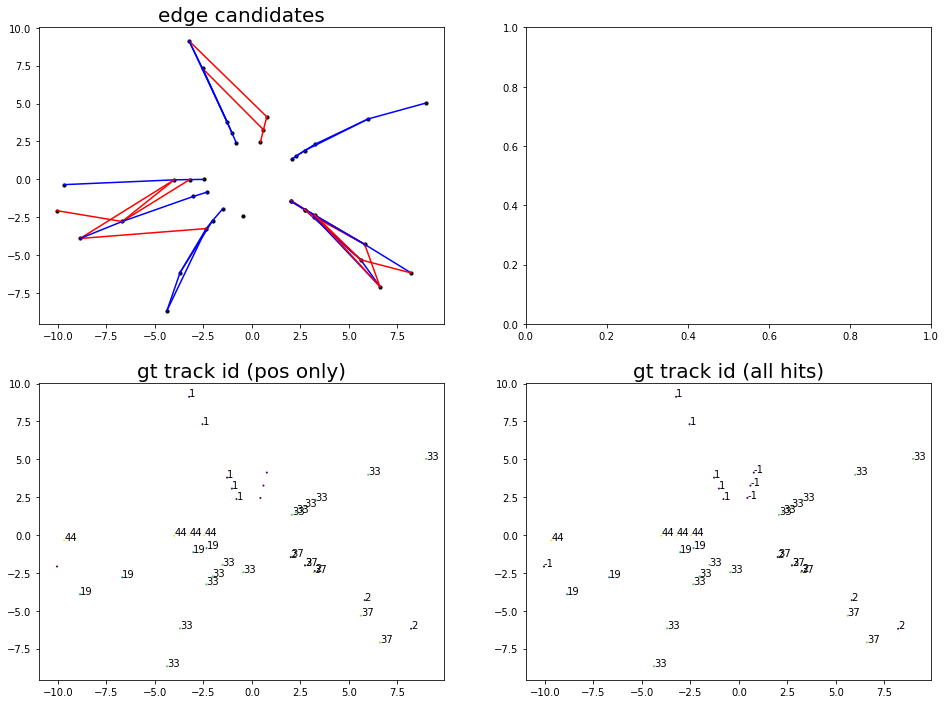

In [5]:
# filename_local = 'event100138000.npz'
# filename = os.path.join(hits_input_dir, filename_local)
#figure(figsize=(8, 6), dpi=80)

filename = '/home/giorgian/data/parsed-4x/trigger/event100002022.npz'
hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum = load_hit_graph(filename)
AXISI, AXISII = 0, 1
x, y = hits_xyz[:, AXISI], hits_xyz[:, AXISII]
start, end = edge_index
label_e = np.logical_and(pid[start] != -1, pid[start] == pid[end])
# print('acc: ', str(np.mean(label_e==(e.reshape(-1)>0.5))))
fig, axs = plt.subplots(2, 2, figsize=(16,12))

color_list = ['r', 'b']
# plot all track
axs[0, 0].scatter(x, y, s=10, c='k')
for i in range(edge_index.shape[1]):
    c = color_list[label_e[i]]
    axs[0, 0].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
                    [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
axs[0, 0].set_title('edge candidates', fontsize=20)

# axs[0, 1].scatter(x, y, s=10, c='k')
# for i in range(edge_index.shape[1]):
#     if e[i] > 0.5:
#         if (e[i]> 0.5) == label_e[i]:
#             c = 'b'
#         else:
#             c = 'r'
#         axs[0, 1].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
#                     [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
# axs[0, 1].set_title('predicted edges', fontsize=20)

axs[1, 0].scatter(x, y, s=1, c=pid)
for i in range(hits.shape[0]):
    if pid[i] > 0:
        axs[1, 0].annotate(int(pid[i]), (x[i], y[i]))
axs[1, 0].set_title('gt track id (pos only)', fontsize=20)

axs[1, 1].scatter(x, y, s=1, c=pid)
for i in range(hits.shape[0]):
    axs[1, 1].annotate(int(pid[i]), (x[i], y[i]))
axs[1, 1].set_title('gt track id (all hits)', fontsize=20)

In [25]:
hits[:, 3]

array([ 4.,  4., 12.,  2.,  2.,  4.,  4.,  6.,  3.,  3.,  4., 11.,  4.,
        2.,  4.,  3.,  4.,  2.,  4.,  8.,  3.,  2.,  2.,  4.,  2.,  2.,
        1.,  1.,  2.,  1.,  2.,  1.,  1.,  3.,  2.,  2.,  3.,  2.,  2.])

(4, 15) (4,)


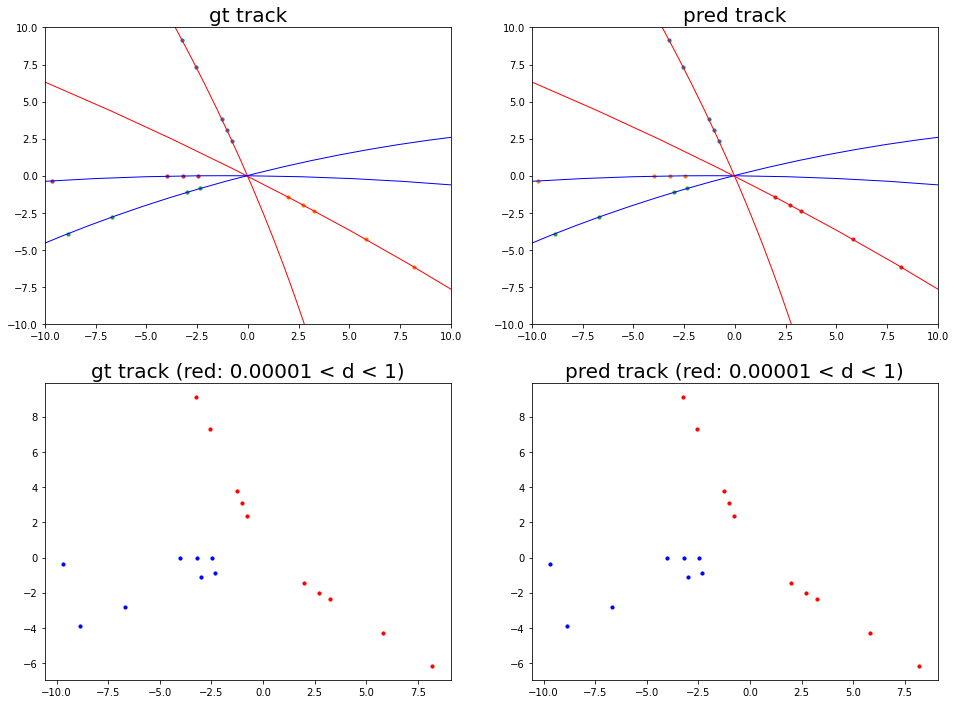

In [6]:
add_circle = True
fig, axs = plt.subplots(2, 2, figsize=(16,12))

# filename = os.path.join(gt_trk_input_dir, filenames[file_index])
filename = '/home/giorgian/data/gt-trackvec/trigger/event100002022.npz'
track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, adj = load_gt_track_graph(filename)
gt_circle = get_circle(track_vector)
print(track_vector.shape, gt_circle[0].shape)
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[:15].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 0].scatter(x, y, s=10)
    axs[0, 0].set_title('gt track', fontsize=20)
    
    psv = origin_vertices[i]
    d = get_distance(psv, ip)
    if 0.00001 < d < 1:
        c = 'r'
    else:
        c = 'b'
    axs[1, 0].scatter(x, y, s=10, c=c)
    axs[1, 0].set_title('gt track (red: 0.00001 < d < 1)', fontsize=20)

    if add_circle:
        radius, center = gt_circle.radius[i], gt_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 0].add_patch(circle)
            axs[0, 0].set_xlim([-10, 10])
            axs[0, 0].set_ylim([-10, 10])
    

filename = '/home/giorgian/data/gt-4x/trigger/event100002022.npz'
#filename = os.path.join(pred_trk_input_dir, filenames[file_index])
track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
pred_circle = get_circle(track_vector[:, 1:16])
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[1:16].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 1].scatter(x, y, s=10)
    axs[0, 1].set_title('pred track', fontsize=20)
    psv = origin_vertices[i]
    d = get_distance(psv, ip)
    if 0.00001 < d < 1:
        c = 'r'
    else:
        c = 'b'
    axs[1, 1].scatter(x, y, s=10, c=c)
    axs[1, 1].set_title('pred track (red: 0.00001 < d < 1)', fontsize=20)

    if add_circle:
        radius, center = pred_circle.radius[i], pred_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 1].add_patch(circle)
            axs[0, 1].set_xlim([-10, 10])
            axs[0, 1].set_ylim([-10, 10])

/home1/tingtingxuan/physics-trigger-graph-level-prediction/utils/trackkey.py:184: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A[i], b[i])[0]


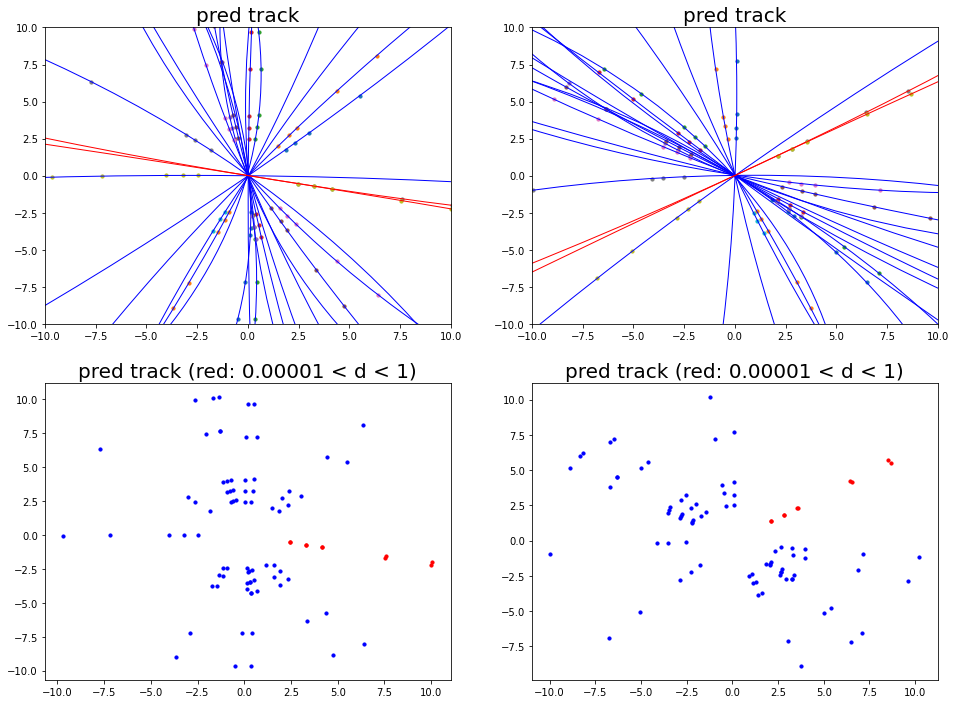

In [11]:
add_circle = True
fig, axs = plt.subplots(2, 2, figsize=(16,12))
filename = os.path.join(pred_trk_input_dir, filenames[file_index])
track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
pred_circle = get_circle(track_vector[:, 20:35])
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[20:35].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 0].scatter(x, y, s=10)
    axs[0, 0].set_title('pred track', fontsize=20)
    psv = origin_vertices[i]
    d = get_distance(psv, ip)
    if 0.00001 < d < 1:
        c = 'r'
    else:
        c = 'b'
    axs[1, 0].scatter(x, y, s=10, c=c)
    axs[1, 0].set_title('pred track (red: 0.00001 < d < 1)', fontsize=20)

    if add_circle:
        radius, center = pred_circle.radius[i], pred_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 0].add_patch(circle)
            axs[0, 0].set_xlim([-10, 10])
            axs[0, 0].set_ylim([-10, 10])

filename = os.path.join(pred_trk_input_dir, filenames[file_index])
track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
track_vector = rotate_track(track_vector, np.pi/4)
pred_circle = get_circle(track_vector[:, 20:35])
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[20:35].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 1].scatter(x, y, s=10)
    axs[0, 1].set_title('pred track', fontsize=20)
    psv = origin_vertices[i]
    d = get_distance(psv, ip)
    if 0.00001 < d < 1:
        c = 'r'
    else:
        c = 'b'
    axs[1, 1].scatter(x, y, s=10, c=c)
    axs[1, 1].set_title('pred track (red: 0.00001 < d < 1)', fontsize=20)

    if add_circle:
        radius, center = pred_circle.radius[i], pred_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 1].add_patch(circle)
            axs[0, 1].set_xlim([-10, 10])
            axs[0, 1].set_ylim([-10, 10])

In [ ]:
file_index += 1

# Compare the trigger prediction result of gt-track vs pred-track

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import sys
import pickle
import torch
import torch.nn.functional as F
import torch.nn as nn

import sklearn.metrics as metrics
from scipy.sparse import coo_matrix
from scipy.stats import mode
from icecream import ic


import matplotlib.cm as cm



In [54]:
project_dir = '/home1/tingtingxuan/physics-trigger-graph-level-prediction'
sys.path.append(project_dir)
os.chdir(project_dir)

from utils.log import load_config
from utils.log import load_checkpoint
import utils.trackkey as tk

def fix_track(track_vector):
    unpacked = tk.unpack_track(track_vector)
    return tk.simple_pack_track(unpacked)

DEVICE = 'cuda:1'
modes = ['gt_track', 'predicted_trk']
# Set Transformer Inference

def get_model(model_mode):
    if model_mode == 'gt_track':
        result_dir = '/home1/tingtingxuan/physics-trigger-graph-level-prediction/icdm_important_checkpoints/gt_model'
        config_file = os.path.join(result_dir, 'config.pkl')
        config = pickle.load(open(config_file, 'rb'))

        from models.Biatt import Bipartite_Attention4 as Model

        config['model']['num_features'] += 3*config['data']['use_momentum'] + config['data']['use_radius']
        model = Model(**config['model'])

        model = model.to(DEVICE)

        checkpoint_dir = os.path.join(result_dir, 'checkpoints')
        checkpoint_file = sorted([os.path.join(checkpoint_dir, f) for f in os.listdir(checkpoint_dir) if f.startswith('model_checkpoint')])
        checkpoint_file = checkpoint_file[-1]
        print(checkpoint_file)
        model = load_checkpoint(checkpoint_file, model)
        print('Successfully reloaded!')

    elif model_mode == 'predicted_trk':
        result_dir = '/home1/tingtingxuan/physics-trigger-graph-level-prediction/train_results/icdm/biatt/experiment_2022-06-06_14:25:32'
        config_file = os.path.join(result_dir, 'config.pkl')
        config = pickle.load(open(config_file, 'rb'))

        from models.Bipartite_Attention_Masked import Bipartite_Attention as Model
        mconfig = config['model']
        del mconfig['name']
        model = Model(**mconfig)

        model = model.to(DEVICE)

        result_dir = '/home1/tingtingxuan/physics-trigger-graph-level-prediction/train_results/icdm/biatt/experiment_2022-06-07_14:49:38'
        checkpoint_dir = os.path.join(result_dir, 'checkpoints')
        checkpoint_file = sorted([os.path.join(checkpoint_dir, f) for f in os.listdir(checkpoint_dir) if f.startswith('model_checkpoint')])
        checkpoint_file = checkpoint_file[-1]
        print(checkpoint_file)
        model = load_checkpoint(checkpoint_file, model)
        print('Successfully reloaded!')
    return model

In [74]:
def get_data(data_mode, trigger_samples=1000, backgournd_samples=1000):
    if data_mode == 'gt_track':
        test_dir = '/home/giorgian/data/presplit/test_gt'
        test_data_files = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.startswith('event0')])[:backgournd_samples]
        test_data_files += sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.startswith('event1')])[:trigger_samples]
    elif data_mode == 'predicted_trk':
        test_dir = '/home/giorgian/data/icdm/highmtracks/test'
        test_data_files = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.startswith('event0')])[:backgournd_samples]
        test_data_files += sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.startswith('event1')])[:trigger_samples]
    
    return test_data_files


In [160]:
def run_inference(model, tracks):
    if tracks.shape[0] == 0:
        return 0, 0
    model.to(DEVICE)
    model.eval()
    tracks = fix_track(tracks)
    tracks = torch.tensor(tracks)
    tracks = tracks.unsqueeze(0)
    mask = torch.ones((tracks.shape[0], tracks.shape[1]))
    tracks = tracks.to(DEVICE, torch.float)
    mask = mask.to(DEVICE)
   
    pred_labels = model(tracks, mask).view(-1, 2)
    pred = pred_labels.max(dim=1)[1].cpu().data.numpy().item()
    pred_prob = nn.Softmax(dim=1)(pred_labels)[:, 1].detach().cpu().numpy().flatten().item()

    return pred, pred_prob

def run_inference_nomask(model, tracks, radii):
    model.eval()

    tracks = torch.tensor(tracks)
    tracks = tracks.unsqueeze(0)
    tracks = tracks.to(DEVICE, torch.float)

    radii = torch.tensor(radii).to(DEVICE)
    radii = radii.to(tracks.dtype).unsqueeze(0)
    tracks = torch.cat((tracks, radii), dim=-1)
   
    pred_labels = model(tracks).view(-1, 2)
    pred = pred_labels.max(dim=1)[1].cpu().data.numpy().item()
    pred_prob = nn.Softmax(dim=1)(pred_labels)[:, 1].detach().cpu().numpy().flatten().item()

    return pred, pred_prob

In [57]:
from numpy.linalg import inv
def matmul_3D(A, B):
    return np.einsum('lij,ljk->lik', A, B)


def get_length(start, end):
    return np.sqrt(np.sum((start - end)**2, axis=1))

def get_approximate_radii(tracks_info, n_hits, good_hits):
    x_indices = [3*j for j in range(5)]
    y_indices = [3*j+1 for j in range(5)]
    r = np.zeros((tracks_info.shape[0], 1))
    for n_hit in range(3, 5 + 1):
        complete_tracks = tracks_info[n_hits == n_hit]
        hit_indices = good_hits[n_hits == n_hit]
        if complete_tracks.shape[0] == 0:
            continue

        A = np.ones((complete_tracks.shape[0], n_hit, 3))
        x_values = complete_tracks[:, x_indices]
        x_values = x_values[hit_indices].reshape(complete_tracks.shape[0], n_hit)

        y_values = complete_tracks[:, y_indices]
        y_values = y_values[hit_indices].reshape(complete_tracks.shape[0], n_hit)
        A[:, :, 0] = x_values
        A[:, :, 1] = y_values

        y = - x_values**2 - y_values**2
        y = y.reshape((y.shape[0], y.shape[1], 1))
        AT = np.transpose(A, axes=(0, 2, 1))
        c = matmul_3D(matmul_3D(inv(matmul_3D(AT, A)), AT), y)
        r[n_hits == n_hit] == 1
        r[n_hits == n_hit] = np.sqrt(c[:, 0]**2 + c[:, 1]**2 - 4*c[:, 2])/200
    #test = get_approximate_radius(tracks_info, n_hits == 5)
    #assert np.allclose(test, r[n_hits == 5])

    return r

In [58]:
def run_inference_for_filelist(model, filenames, type):
    labels = []
    preds = []
    pred_probs = []

    for i, filename in enumerate(filenames):
        # ic(filename)
        if type == 'gt_track':
            track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, adj = load_gt_track_graph(filename)
            geo_features = np.zeros((track_vector.shape[0], 13))
            phi  = np.zeros((track_vector.shape[0], 5))
            geo_features[:, 5] = np.arctan2(track_vector[:, 1], track_vector[:, 0])
            for i in range(4):
                geo_features[:, i] = get_length(track_vector[:, (3*i+3):(3*i+6)], track_vector[:, (3*i):(3*i+3)])
            for i in range(5):
                phi[:, i] = np.arctan2(track_vector[:, (3*i)+1], track_vector[:, (3*i)])
            geo_features[:, 5] = get_length(track_vector[:, 12:15], track_vector[:, 0:3])
            geo_features[:, 6:10] = np.diff(phi)
            geo_features[:, 10:13] = np.mean(track_vector.reshape((track_vector.shape[0], 5, 3)), axis=(0, 1))
            track_vector = np.concatenate([track_vector, geo_features], axis=1)

            hits = track_vector[:, :15].reshape(track_vector.shape[0], 5, 3)
            good_hits = np.all(hits != 0, axis=-1)
            n_hits = np.sum(good_hits, axis=-1)
            radius = get_approximate_radii(track_vector, n_hits, good_hits)
        elif type == 'predicted_trk':
            track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
                
        if track_vector.shape[0] == 0:
            labels.append(trigger.item())
            preds.append(0)
            pred_probs.append(0)
            continue

        if type == 'gt_track':
            pred, pred_prob = run_inference_nomask(model, track_vector, radius)
        elif type == 'predicted_trk':
            pred, pred_prob = run_inference(model, track_vector)
        labels.append(trigger.item())
        preds.append(pred)
        pred_probs.append(pred_prob)

        if i % 1000 == 0:
            ic(i, filename)

    print('done!')
    return labels, preds, pred_probs

In [59]:
gt_model = get_model('gt_track')
pred_model = get_model('predicted_trk')
gt_filenames = get_data('gt_track', trigger_samples=1000, backgournd_samples=1000)
p_filenames = get_data('predicted_trk', trigger_samples=1000, backgournd_samples=1000)
gt_labels, gt_preds, gt_pred_probs = run_inference_for_filelist(gt_model, gt_filenames, 'gt_track')
p_labels, p_preds, p_pred_probs = run_inference_for_filelist(pred_model, p_filenames, 'predicted_trk')

/home1/tingtingxuan/physics-trigger-graph-level-prediction/icdm_important_checkpoints/gt_model/checkpoints/model_checkpoint_041.pth.tar
Successfully reloaded!
/home1/tingtingxuan/physics-trigger-graph-level-prediction/train_results/icdm/biatt/experiment_2022-06-07_14:49:38/checkpoints/model_checkpoint_050.pth.tar
Successfully reloaded!


/home1/tingtingxuan/anaconda3/envs/pytorch-cuda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home1/tingtingxuan/anaconda3/envs/pytorch-cuda/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
ic| i: 0
    filename: '/home/giorgian/data/icdm/highmtracks/test/event001345188.npz'


done!


ic| i: 1000
    filename: '/home/giorgian/data/icdm/highmtracks/test/event101604412.npz'


done!


Text(0.5, 0.98, 'trigger probablity comparison between gt_tracks and pred_tracks')

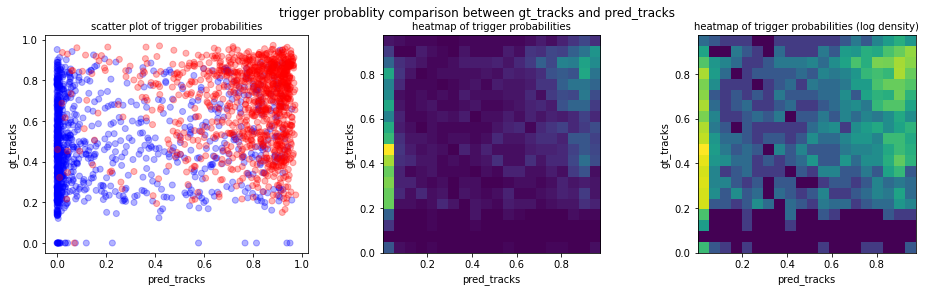

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))

color = np.array(['b', 'r'])
axs[0].scatter(p_pred_probs, gt_pred_probs, c=color[p_labels], alpha=0.3)
axs[0].set_xlabel('pred_tracks')
axs[0].set_ylabel('gt_tracks')
axs[0].set_title('scatter plot of trigger probabilities', fontsize=10)

heatmap, xedges, yedges = np.histogram2d(p_pred_probs, gt_pred_probs, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

axs[1].imshow(heatmap.T, extent=extent, origin='lower')
axs[1].set_xlabel('pred_tracks')
axs[1].set_ylabel('gt_tracks')
axs[1].set_title('heatmap of trigger probabilities', fontsize=10)


heatmap, xedges, yedges = np.histogram2d(p_pred_probs, gt_pred_probs, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

axs[2].imshow(np.log(1+heatmap.T), extent=extent, origin='lower')
axs[2].set_xlabel('pred_tracks')
axs[2].set_ylabel('gt_tracks')
axs[2].set_title('heatmap of trigger probabilities (log density)', fontsize=10)

plt.suptitle('trigger probablity comparison between gt_tracks and pred_tracks')

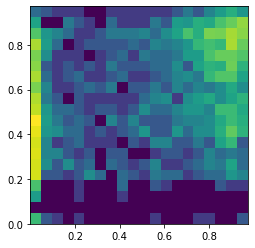

In [61]:
heatmap, xedges, yedges = np.histogram2d(p_pred_probs, gt_pred_probs, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(np.log(1+heatmap.T), extent=extent, origin='lower')
plt.show()

# Find the most different prediction and compare the event plot

# Trigger Tracks vs Background Tracks

In [159]:
import random
import seaborn as sns
import pandas as pd
DEVICE = 'cuda:0'

In [78]:
preds1  = []
pred_probs1 = []
preds2 = []
pred_probs2 = []
for filename in p_filenames[:10]:
    track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
    
    pred, pred_prob = run_inference(pred_model, track_vector)
    # ic(np.mean(pred_prob), np.mean(pred))
    preds1.append(pred)
    pred_probs1.append(pred_prob)

    track_vector = track_vector[is_trigger_track == False]
    pred, pred_prob = run_inference(pred_model, track_vector)
    preds2.append(pred)
    pred_probs2.append(pred_prob)
    # ic(np.mean(pred_prob), np.mean(pred))
    # ic(is_trigger_track)
    # ic(track_vector.shape)
ic(np.mean(pred_probs1), np.mean(preds1))
ic(np.mean(pred_probs2), np.mean(preds2))

ic| np.mean(pred_probs1): 0.7034052759408951, np.mean(preds1): 0.8
ic| np.mean(pred_probs2): 0.309779139503371, np.mean(preds2): 0.3


(0.309779139503371, 0.3)

In [151]:
p_filenames = get_data('predicted_trk', trigger_samples=10000, backgournd_samples=0)
preds1  = []
pred_probs1 = []
preds2 = []
pred_probs2 = []
preds3 = []
pred_probs3 = []
for filename in p_filenames:
    track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
    
    pred, pred_prob = run_inference(pred_model, track_vector)
    # ic(np.mean(pred_prob), np.mean(pred))
    preds1.append(pred)
    pred_probs1.append(pred_prob)

    track_vector2 = track_vector[is_trigger_track == False]
    pred, pred_prob = run_inference(pred_model, track_vector2)
    preds2.append(pred)
    pred_probs2.append(pred_prob)

    nontrigger_track_selected = random.choices(np.where(is_trigger_track == False)[0], k=min(np.sum(is_trigger_track == False), np.sum(is_trigger_track)))
    mask = np.ones(track_vector.shape[0]) 
    mask[nontrigger_track_selected] = 0
    track_vector3 = track_vector[mask == 1]
    pred, pred_prob = run_inference(pred_model, track_vector3)
    preds3.append(pred)
    pred_probs3.append(pred_prob)

    # ic(np.mean(pred_prob), np.mean(pred))
    # ic(is_trigger_track)
    # ic(track_vector.shape)
ic(np.mean(pred_probs1), np.mean(preds1))
ic(np.mean(pred_probs2), np.mean(preds2))
ic(np.mean(pred_probs3), np.mean(preds3))

ic| np.mean(pred_probs1): 0.7746836006766884, np.mean(preds1): 0.9006
ic| np.mean(pred_probs2): 0.3978270854793605, np.mean(preds2): 0.4287
ic| np.mean(pred_probs3): 0.7623598285543849, np.mean(preds3): 0.8769


(0.7623598285543849, 0.8769)

In [218]:
a = pd.DataFrame({ 'Trigger Events' : np.repeat('AT',len(pred_probs1)), 'Trigger Prob': pred_probs1})
b = pd.DataFrame({ 'Trigger Events' : np.repeat('TT + SNT',len(pred_probs3)), 'Trigger Prob': pred_probs3})
c = pd.DataFrame({ 'Trigger Events' : np.repeat('NT',len(pred_probs2)), 'Trigger Prob': pred_probs2})

/tmp/ipykernel_657639/3159634726.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(c)


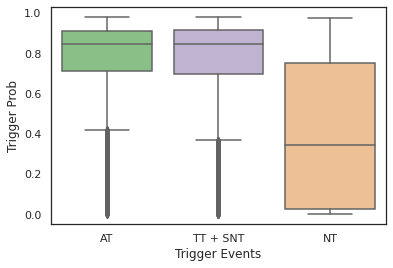

In [220]:
df=a.append(b).append(c)
# sns.set(style="darkgrid")
# Usual boxplot
ax = sns.boxplot(x='Trigger Events', y='Trigger Prob', data=df, palette='Accent') #, palette=sns.hls_palette(8, l=.7, s=.9))
# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, .3))
plt.savefig('/home1/tingtingxuan/physics-trigger-graph-level-prediction/analysis/plots/track-set.png')

In [162]:
def run_inference_with_mask_layer_i(track_vector, i, pred_model):
    masked_index = [20+i*3, 20+i*3+1, 20+i*3+2]
    track_vector[:, masked_index] = 0
    pred, pred_prob = run_inference(pred_model, track_vector)
    return pred, pred_prob

In [210]:
p_filenames = get_data('predicted_trk', trigger_samples=10000, backgournd_samples=0)
preds = [[] for _ in range(6)]
pred_probs = [[] for _ in range(6)]
for filename in p_filenames:
    track_vector, complete_flags, origin_vertices, momentums, pids, trigger, ip, adj, radius, is_trigger_track, n_hits, n_tracks = load_pred_track_graph(filename)
    pred, pred_prob = run_inference(pred_model, track_vector)
    preds[5].append(pred)
    pred_probs[5].append(pred_prob)
    for i in range(5):
        pred, pred_prob = run_inference_with_mask_layer_i(track_vector, i, pred_model)
        # ic(np.mean(pred_prob), np.mean(pred))
        preds[i].append(pred)
        pred_probs[i].append(pred_prob)

    # ic(np.mean(pred_prob), np.mean(pred))
    # ic(is_trigger_track)
    # ic(track_vector.shape)
for i in range(5):
    ic(np.mean(pred_probs[i]), np.mean(preds[i]))


ic| np.mean(pred_probs[i]): 0.779609556225501
    np.mean(preds[i]): 0.9047
ic| np.mean(pred_probs[i]): 0.7668973641010293
    np.mean(preds[i]): 0.8917
ic| np.mean(pred_probs[i]): 0.7191037980221445
    np.mean(preds[i]): 0.836
ic| np.mean(pred_probs[i]): 0.48612807030876865
    np.mean(preds[i]): 0.4976
ic| np.mean(pred_probs[i]): 0.23350777857320498
    np.mean(preds[i]): 0.1813


In [211]:
a = pd.DataFrame({ 'Layer Dropped' : np.repeat('none',len(pred_probs[5])), 'Trigger Prob': pred_probs[5]})
df = a
for i in range(5):
    df = df.append(pd.DataFrame({ 'Layer Dropped' : np.repeat(f'{i+1}',len(pred_probs[i])), 'Trigger Prob': pred_probs[i]}))

/tmp/ipykernel_657639/2959452308.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({ 'Layer Dropped' : np.repeat(f'{i+1}',len(pred_probs[i])), 'Trigger Prob': pred_probs[i]}))
/tmp/ipykernel_657639/2959452308.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({ 'Layer Dropped' : np.repeat(f'{i+1}',len(pred_probs[i])), 'Trigger Prob': pred_probs[i]}))
/tmp/ipykernel_657639/2959452308.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({ 'Layer Dropped' : np.repeat(f'{i+1}',len(pred_probs[i])), 'Trigger Prob': pred_probs[i]}))
/tmp/ipykernel_657639/2959452308.py:4: FutureWarning: The frame.append method is deprecated and will be removed fro

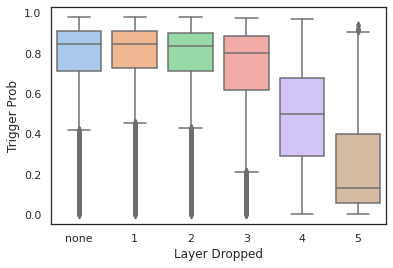

In [216]:
ax = sns.boxplot(x='Layer Dropped', y='Trigger Prob', data=df, palette='pastel') #, palette=sns.hls_palette(8, l=.7, s=.9))
# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, .3))
plt.savefig('/home1/tingtingxuan/physics-trigger-graph-level-prediction/analysis/plots/layer_importantce.png')